## Dask Starter Notebook


This notebook loads the policies data into a dask dataframe and showcases some basic computations on the data. Writing Dask is extremely similar to writing pandas: a lot of methods, attributes etc. work the same way in both. One big difference, that allows Dask to handle big amounts of data, is that it computes lazily, i.e. only when the result is explicitly requested. For this you need to append `.compute()` to pandas method calls, as can be seen below with `groupby()` and `describe()`. Computing a Series or DataFrame will result in a pandas Series or DataFrame, with which you can do all the usual stuff, like plotting with matplotlib, as given some horrible examples of below. That also means these might still be huge and crash the kernel, if the data has not been cut down to sufficiently small size. [Quick intro to Dask in pandas docs](https://pandas.pydata.org/docs/user_guide/scale.html), [Dask docs](https://docs.dask.org/en/stable/dataframe.html).

In [29]:
import dask.dataframe as dd
import pandas as pd


In [12]:
df = dd.read_csv("../../data/FimaNfipPolicies.csv", dtype={"agricultureStructureIndicator": "int64", "baseFloodElevation": "float64", 
"basementEnclosureCrawlspace": "float64", "censusTract": "float64", "cancellationDateOfFloodPolicy": "object", "condominiumIndicator": "object", "construction": "int64", 
"countyCode": "float64", "crsClassCode": "float64", "deductibleAmountInBuildingCoverage": "object", "deductibleAmountInContentsCoverage": "object", "elevationBuildingIndicator": "int64",
"elevationCertificateIndicator": "float64", "elevationDifference": "float64", "federalPolicyFee": "int64", "floodZone": "object", "hfiaaSurcharge": "int64", 
"houseOfWorshipIndicator": "int64", "latitude": "float64",
"longitude":                             "float64",
"locationOfContents":                    "float64",
"lowestAdjacentGrade":                   "float64",
"lowestFloorElevation":                  "float64",
"nonProfitIndicator":                      "int64",
"numberOfFloorsInTheInsuredBuilding":    "float64",
"obstructionType":                       "float64",
"occupancyType":                         "float64",
"originalConstructionDate":               "object",
"originalNBDate":                         "object",
"policyCost":                              "int64",
"policyCount":                             "int64",
"policyEffectiveDate":                    "object",
"policyTerminationDate":                  "object",
"policyTermIndicator":                   "float64",
"postFIRMConstructionIndicator":           "int64",
"primaryResidenceIndicator":               "int64",
"propertyState":                          "object",
"reportedZipCode":                       "object",
"rateMethod":                             "object",
"regularEmergencyProgramIndicator":       "object",
"reportedCity":                           "object",
"smallBusinessIndicatorBuilding":          "int64",
"totalBuildingInsuranceCoverage":        "float64",
"totalContentsInsuranceCoverage":        "float64",
"totalInsurancePremiumOfThePolicy":      "float64",
"id":                                     "object"})

In [20]:
df.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 46 entries, agricultureStructureIndicator to id
dtypes: object(15), float64(19), int64(12)

In [30]:
pd.set_option('display.max_columns', None)
df.head()

,agricultureStructureIndicator,baseFloodElevation,basementEnclosureCrawlspace,censusTract,cancellationDateOfFloodPolicy,condominiumIndicator,construction,countyCode,crsClassCode,deductibleAmountInBuildingCoverage,deductibleAmountInContentsCoverage,elevationBuildingIndicator,elevationCertificateIndicator,elevationDifference,federalPolicyFee,floodZone,hfiaaSurcharge,houseOfWorshipIndicator,latitude,longitude,locationOfContents,lowestAdjacentGrade,lowestFloorElevation,nonProfitIndicator,numberOfFloorsInTheInsuredBuilding,obstructionType,occupancyType,originalConstructionDate,originalNBDate,policyCost,policyCount,policyEffectiveDate,policyTerminationDate,policyTermIndicator,postFIRMConstructionIndicator,primaryResidenceIndicator,propertyState,reportedZipCode,rateMethod,regularEmergencyProgramIndicator,reportedCity,smallBusinessIndicatorBuilding,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,totalInsurancePremiumOfThePolicy,id
0,0,1.0,NaN,2.207100e+10,NaN,N,0,22071.0,7.0,1,0,0,3.0,1.0,40,AOB,0,0,30.1,-90.0,NaN,0.0,2.0,0,1.0,NaN,1.0,1981-06-15T00:00:00.000Z,2011-01-15T00:00:00.000Z,132,1,2013-01-15T00:00:00.000Z,2014-01-15T00:00:00.000Z,1.0,1,0,LA,70128,1,R,Temporarily Unavailable,0,34600.0,0.0,92.0,139f1262-a301-44c9-bb58-98d5b8763032
1,0,1.0,NaN,2.207100e+10,NaN,N,0,22071.0,7.0,1,0,0,3.0,1.0,40,AOB,0,0,30.1,-90.0,NaN,0.0,2.0,0,1.0,NaN,1.0,1981-06-15T00:00:00.000Z,2011-01-15T00:00:00.000Z,132,1,2012-01-15T00:00:00.000Z,2013-01-15T00:00:00.000Z,1.0,1,0,LA,70128,1,R,Temporarily Unavailable,0,34600.0,0.0,92.0,8fe661f8-ab82-4566-baa3-091dc729e1f4
2,0,1.0,NaN,2.207100e+10,NaN,N,0,22071.0,7.0,1,0,0,3.0,1.0,40,AOB,0,0,30.1,-90.0,NaN,0.0,2.0,0,1.0,NaN,1.0,1981-06-15T00:00:00.000Z,2011-01-15T00:00:00.000Z,132,1,2011-01-15T00:00:00.000Z,2012-01-15T00:00:00.000Z,1.0,1,0,LA,70128,1,R,Temporarily Unavailable,0,34600.0,0.0,92.0,a75a4ed2-72b8-4f25-a372-da04e6349694
3,0,NaN,NaN,2.207101e+10,NaN,N,0,22071.0,7.0,2,2,1,1.0,NaN,40,A03,0,0,30.0,-90.1,2.0,0.0,NaN,0,2.0,50.0,1.0,2040-06-15T00:00:00.000Z,2011-01-16T00:00:00.000Z,940,1,2011-01-16T00:00:00.000Z,2012-01-16T00:00:00.000Z,1.0,0,1,LA,70118,1,R,Temporarily Unavailable,0,107000.0,20000.0,900.0,4d442216-c7bf-42c9-993a-2019323e1db4
4,0,NaN,NaN,2.207100e+10,NaN,N,0,22071.0,7.0,2,2,0,1.0,NaN,40,A07,0,0,30.0,-90.1,4.0,0.0,NaN,0,2.0,NaN,2.0,1965-01-01T00:00:00.000Z,2011-01-15T00:00:00.000Z,1334,1,2012-01-15T00:00:00.000Z,2013-01-15T00:00:00.000Z,1.0,0,1,LA,70117,1,R,Temporarily Unavailable,0,140800.0,42000.0,1294.0,828b664a-0adf-4672-94e9-194248f438a1


In [16]:
df.groupby("countyCode").mean().compute()

,agricultureStructureIndicator,baseFloodElevation,basementEnclosureCrawlspace,censusTract,construction,crsClassCode,elevationBuildingIndicator,elevationCertificateIndicator,elevationDifference,federalPolicyFee,...,occupancyType,policyCost,policyCount,policyTermIndicator,postFIRMConstructionIndicator,primaryResidenceIndicator,smallBusinessIndicatorBuilding,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,totalInsurancePremiumOfThePolicy
countyCode,,,,,,,,,,,,,,,,,,,,,
12.0,0.007246,14.969841,0.024967,NaN,0.028986,5.617357,0.253623,2.774892,2.334921,45.167572,...,1.980072,1039.230072,1.124094,1.000000,0.722826,0.503623,0.042572,235986.956522,50278.804348,791.977355
17.0,0.000000,534.685714,1.009709,NaN,0.000000,7.214286,0.559406,NaN,2.952381,43.242574,...,2.336634,873.846535,1.000000,1.000000,0.480198,0.524752,0.049505,107636.633663,63130.198020,666.415842
22.0,0.000000,197.849216,0.000000,NaN,0.003492,7.937792,0.340084,2.900000,2.240190,40.102654,...,1.674581,822.012570,1.000000,1.000000,0.791201,0.613128,0.028631,181907.122905,45710.265363,619.588687
1003.0,0.000034,73.723270,0.714378,1.003011e+09,0.003084,7.315572,0.509099,2.384697,3.326576,66.957527,...,1.842179,1293.181547,2.338633,1.001447,0.870964,0.482888,0.007610,443314.619142,60305.621884,1060.072257
1043.0,0.000000,463.555328,1.070978,1.043965e+09,0.012596,NaN,0.498950,2.773622,3.003854,36.478656,...,1.550035,749.392582,1.000000,1.000000,0.615115,0.582225,0.017495,163810.496851,45016.165150,583.822953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29085.0,0.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,36.666667,...,4.000000,861.333333,1.000000,1.000000,0.000000,0.000000,0.000000,90800.000000,23400.000000,824.666667
29227.0,0.000000,NaN,2.000000,2.922796e+10,0.000000,NaN,0.000000,NaN,NaN,40.571429,...,1.000000,336.285714,1.000000,1.000000,0.000000,0.714286,0.000000,24985.714286,0.000000,257.000000
38.0,0.000000,NaN,1.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,25.000000,...,1.000000,534.000000,1.000000,1.000000,1.000000,1.000000,0.000000,250000.000000,100000.000000,421.000000


In [18]:
df.describe().compute()

,agricultureStructureIndicator,baseFloodElevation,basementEnclosureCrawlspace,censusTract,construction,countyCode,crsClassCode,elevationBuildingIndicator,elevationCertificateIndicator,elevationDifference,...,occupancyType,policyCost,policyCount,policyTermIndicator,postFIRMConstructionIndicator,primaryResidenceIndicator,smallBusinessIndicatorBuilding,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,totalInsurancePremiumOfThePolicy
count,6.141428e+07,2.154278e+07,2.508423e+07,6.106161e+07,6.141428e+07,6.120534e+07,4.447626e+07,6.141428e+07,1.495177e+07,2.183732e+07,...,6.138617e+07,6.141428e+07,6.141428e+07,6.141413e+07,6.141428e+07,6.141428e+07,6.141428e+07,6.141397e+07,6.141208e+07,6.141413e+07
mean,5.947639e-04,3.228299e+02,6.813089e-01,2.625095e+10,1.928607e-03,2.627391e+04,6.258923e+00,1.777941e-01,2.085269e+00,1.594389e+00,...,1.713396e+00,9.630080e+02,1.255176e+00,1.006150e+00,5.505555e-01,7.004227e-01,1.137066e-02,2.442354e+05,5.849948e+04,8.034454e+02
std,2.438053e-02,1.486465e+03,1.039847e+00,1.585605e+10,4.387354e-02,1.588407e+04,1.491518e+00,3.823393e-01,1.035596e+00,7.889538e+01,...,2.123534e+00,1.944266e+03,5.187299e+00,1.106864e-01,4.974376e-01,4.580729e-01,1.060253e-01,1.039159e+06,6.022300e+04,1.723440e+03
min,0.000000e+00,-9.999000e+03,0.000000e+00,1.001020e+09,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-9.000000e+04,...,1.000000e+00,-1.811200e+04,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.764400e+04
25%,0.000000e+00,8.000000e+00,0.000000e+00,1.211138e+10,0.000000e+00,1.211100e+04,5.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,4.500000e+02,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.750000e+05,2.500000e+04,3.480000e+02
50%,0.000000e+00,1.100000e+01,1.000000e+00,3.203100e+10,0.000000e+00,3.202300e+04,7.000000e+00,0.000000e+00,3.000000e+00,2.000000e+00,...,1.000000e+00,6.540000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.500000e+05,9.110000e+04,4.800000e+02
75%,0.000000e+00,9.900000e+02,2.000000e+00,5.403901e+10,0.000000e+00,7.201500e+04,1.000000e+01,1.000000e+00,3.000000e+00,4.000000e+00,...,1.100000e+01,1.406000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.500000e+05,1.000000e+05,1.232000e+03
max,1.000000e+00,9.998000e+03,4.000000e+00,7.803096e+10,1.000000e+00,7.803000e+04,1.000000e+01,1.000000e+00,4.000000e+00,9.980000e+02,...,1.900000e+01,1.907728e+06,1.203000e+03,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.652500e+08,6.000000e+06,1.903850e+06


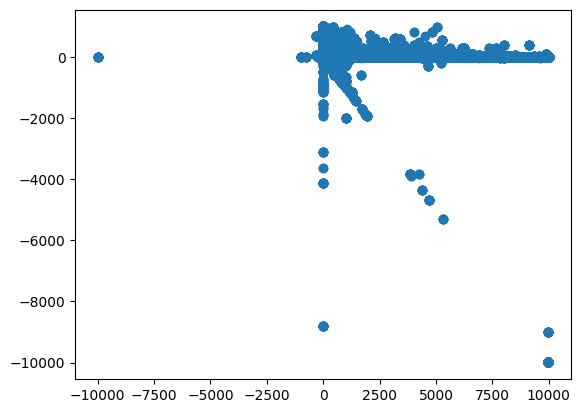

In [22]:
import matplotlib.pyplot as plt

plt.scatter(df.baseFloodElevation.compute(), df.elevationDifference.compute())

(array([6.100000e+01, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        7.880350e+05, 2.004043e+07, 1.454160e+05, 1.030240e+05,
        2.473400e+04, 4.410760e+05]),
 array([-9.9990e+03, -7.9993e+03, -5.9996e+03, -3.9999e+03, -2.0002e+03,
        -5.0000e-01,  1.9992e+03,  3.9989e+03,  5.9986e+03,  7.9983e+03,
         9.9980e+03]),
 <BarContainer object of 10 artists>)

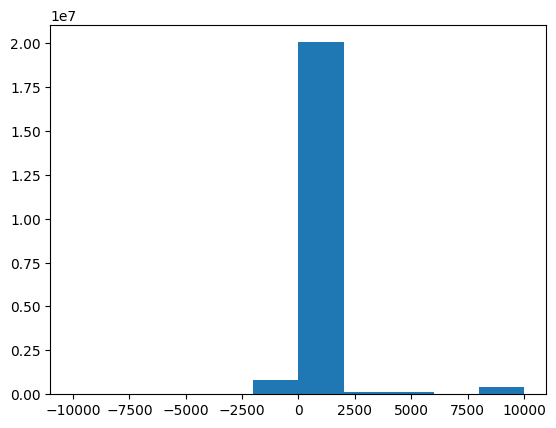

In [23]:
plt.hist(df.baseFloodElevation.compute())

In [24]:
el_diff = df.elevationDifference.compute()

In [25]:
type(el_diff)

pandas.core.series.Series

(array([1.2000000e+01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        3.3800000e+02, 2.1836974e+07]),
 array([-90000. , -80900.2, -71800.4, -62700.6, -53600.8, -44501. ,
        -35401.2, -26301.4, -17201.6,  -8101.8,    998. ]),
 <BarContainer object of 10 artists>)

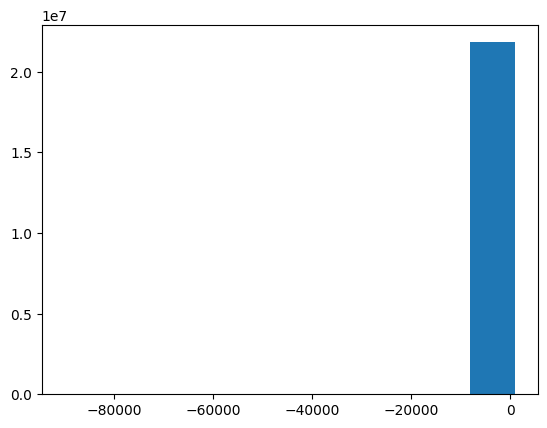

In [26]:
plt.hist(el_diff)